In [1]:
using Plots, Printf, DelimitedFiles, BenchmarkTools, FFTW
using Revise
using MDToolbox
ENV["COLUMNS"] = 130

┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /Users/yasu/.julia/packages/Revise/BqeJF/src/Revise.jl:1328


130

In [2]:
q_array = readdlm("data/quaternion/QUATERNION_LIST_36864_Orient")
model_array = readpdb("data/3gb1.pdb");

In [3]:
model_array = model_array["atomname CA"];
decenter!(model_array);

In [4]:
q_array

36864×4 Array{Float64,2}:
  0.735586  0.0240811   0.462794   0.49412
  0.732436  0.0721391   0.429486   0.523331
  0.72615   0.119888    0.394339   0.5503
  0.716754  0.167124    0.357504   0.574913
  0.704289  0.213644    0.319137   0.597064
  0.688808  0.259249    0.279404   0.616658
  0.670378  0.303744    0.238474   0.633611
  0.649076  0.346939    0.196524   0.647852
  0.624996  0.388647    0.153731   0.659318
  0.598239  0.428692    0.110281   0.667961
  0.56892   0.466901    0.0663581  0.673743
  0.537165  0.50311     0.0221511  0.676641
  0.50311   0.537165   -0.0221511  0.676641
  ⋮                                
 -0.49412   0.462794   -0.0240811  0.735586
 -0.523331  0.429486   -0.0721391  0.732436
 -0.5503    0.394339   -0.119888   0.72615
 -0.574913  0.357504   -0.167124   0.716754
 -0.597063  0.319137   -0.213644   0.704289
 -0.616658  0.279404   -0.259249   0.688808
 -0.633611  0.238474   -0.303744   0.670378
 -0.647852  0.196524   -0.346939   0.649076
 -0.659318  0.1537

# 並進などのテスト

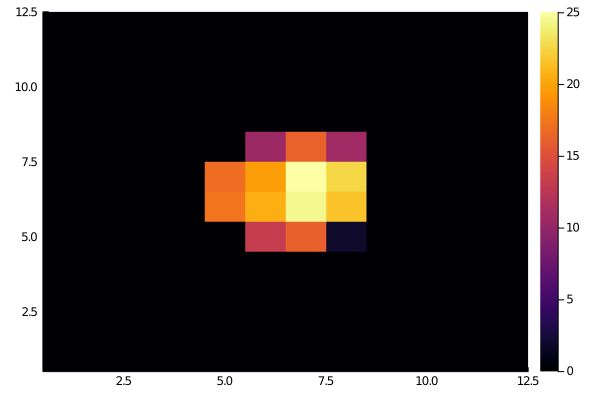

In [5]:
pdbRotated = MDToolbox.rotate(model_array[1, :], q_array[7, :])
calculated = afmize(pdbRotated, MDToolbox.defaultConfig())
observed = calculated
heatmap(observed)

In [6]:
calculated

12×12 Array{Float64,2}:
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0     13.2481  16.1331   1.90415  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  17.3871  20.5284  24.465   21.61     0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  16.8962  19.643   25.0696  22.6061   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0     10.5039  16.2694  10.7847   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0   0.0      0.0      0.0      0.0      0.0  0.0  0.0  0.0

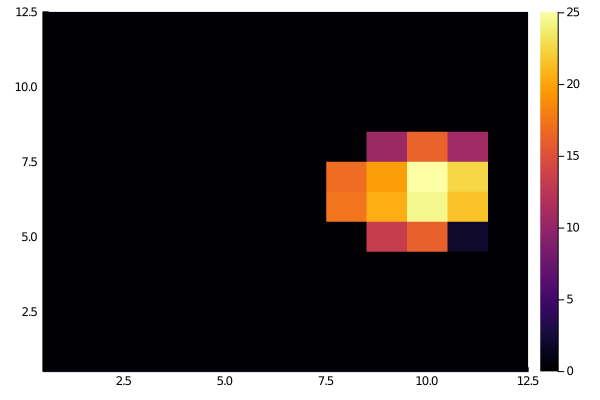

In [7]:
observed_translated = translateafm(observed, (0, 3))
heatmap(observed_translated)

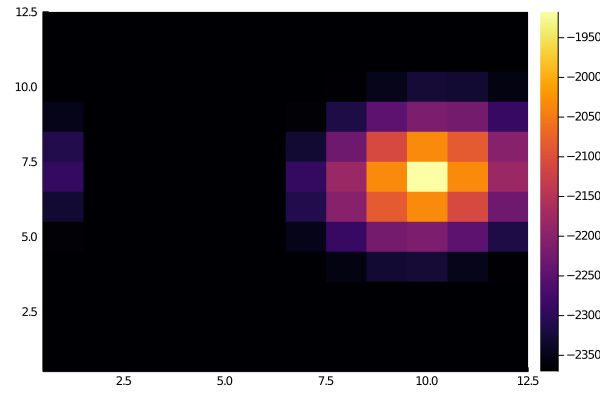

In [8]:
observed_translated = observed_translated .- 100.0
C_o  = sum(observed_translated)
C_c  = sum(calculated)
#@btime C_oc = sum(observed_translated .* calculated)
C_oc = sum(observed_translated .* calculated)
C_cc = sum(calculated.^2)
C_oo = sum(observed_translated.^2)
#@btime C_oc_dxdy = real.(ifftshift(ifft(fft(observed_translated).*conj.(fft(calculated)))))

C_oc_dxdy = real.(ifftshift(ifft(fft(observed_translated).*conj.(fft(calculated)))))
heatmap(C_oc_dxdy)

In [9]:
C_oc_dxdy

12×12 Array{Float64,2}:
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9
 -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23562.0  -23315.3  -23282.7  -23504.4  -23684.9
 -23672.7  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23517.4  -22901.1  -22227.6  -22150.4  -22507.8  -23167.9
 -23306.6  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23129.6  -22031.9  -20855.5  -20340.2  -21096.5  -22310.0
 -22947.2  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -22947.2  -21829.7  -20335.2  -19174.0  -20335.2  -21829.7
 -23129.6  -23704.9  -23704.9  -23704.9  -23704.9  -23704.9  -23306.6  -22310.0  -21096.5  -20340.2  -20855.5  -22031.9
 -23517.4  -2370

In [10]:
maximum(C_oc_dxdy)

-19174.01603518203

In [11]:
C_oo

1.3971211137502175e6

# Posteriorの計算

In [12]:
-log(0)
log(eps(Float64))

-36.04365338911715

In [13]:
npix = Float64(size(observed_translated, 1) * size(observed_translated, 2))
#logprob = 0.5 .* (3.0 .- npix) .* log.(npix .* (C_cc .* C_oo .- C_oc_dxdy.^2) .+ 2.0 .* C_o .* C_oc_dxdy .* C_c .- C_cc .* C_o.^2 .- C_oo .* C_c.^2) .+ (0.5 .* npix .- 2.0) .* log.((npix .- 2.0) .* (npix .* C_cc .- C_c.^2))
log01 = npix .* (C_cc .* C_oo .- C_oc_dxdy.^2) .+ 2.0 .* C_o .* C_oc_dxdy .* C_c .- C_cc .* C_o.^2 .- C_oo .* C_c.^2
log01[log01 .<= 0.0] .= eps(Float64)
log02 = (npix .- 2.0) .* (npix .* C_cc .- C_c.^2)
log02 = log02 <= 0 ? eps(Float64) : log02
logprob = 0.5 .* (3.0 .- npix) .* log.(log01) .+ (0.5 .* npix .- 2.0) .* log.(log02)

12×12 Array{Float64,2}:
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279
 -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.279  -246.656  -246.908  -246.904  -246.76   -246.342
 -246.379  -246.279  -246.279  -246.279  -246.279  -246.279  -246.739  -246.201  -241.873  -241.102  -244.179  -246.819
 -246.908  -246.279  -246.279  -246.279  -246.279  -246.279  -246.767  -239.795  -216.24   -195.743  -223.061  -242.63
 -246.35   -246.279  -246.279  -246.279  -246.279  -246.279  -246.35   -237.203  -195.488  3818.87   -195.488  -237.203
 -246.767  -246.279  -246.279  -246.279  -246.279  -246.279  -246.908  -242.63   -223.061  -195.743  -216.24   -239.795
 -246.739  -246.2

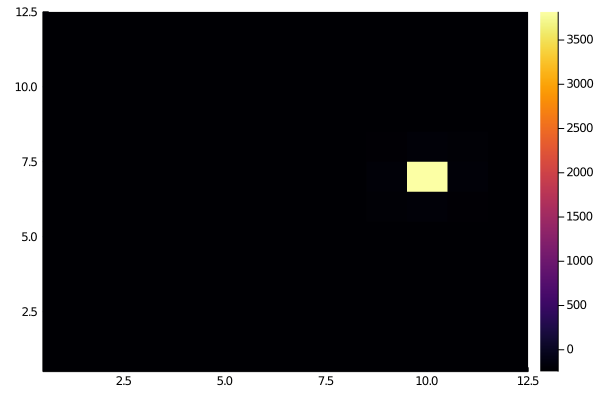

In [14]:
heatmap(logprob)

In [15]:
maximum(logprob)

3818.87463782765

In [16]:
argmax(logprob)

CartesianIndex(7, 10)

In [17]:
x_center = ceil(Int32, (size(observed,1)/2)+1.0)
y_center = ceil(Int32, (size(observed,2)/2)+1.0)

dx_estimated = argmax(logprob)[1] - x_center
dy_estimated = argmax(logprob)[2] - y_center

tra

LoadError: UndefVarError: tra not defined

In [18]:
dx_estimated

0

In [19]:
dy_estimated

3

# やること

- ピクセル数は典型的なAFM像の場合で固定
- ランダムに連続的な角度でAFM像を100個ほど生成
- ベスト構造を推定して答えからのRMSDを求める
- それを様々な「Quaternionの数」「probeRadius」「ノイズの大きさ」でプロット
